In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Contribution of Forest Products to the overall GDP of the country

## Getting the data

Collected from [this link by The Planning Commission of India](http://planningcommission.gov.in/data/datatable/data_2312/DatabookDec2014%202.pdf), I exported it into a CSV. The original file contains for each sector a number of statistics for both 04-05 and 13-14, I use only % contribution to the GDP in the latter.


In [6]:
data = pd.read_csv('../data/1950-2014-sectorsharetototalgdp.csv')

In [7]:
data

,Year,Agriculture & Allied,Unnamed: 2,Agriculture,Unnamed: 4,Industry,Unnamed: 6,Mining & Quarrying,Unnamed: 8,Manufacturing,Unnamed: 10,Services,Unnamed: 12
0,NaN,current,04-05,current,04-05,current,04-05,current,04-05,current,04-05,current,04-05
1,1950-51,51.81,51.88,45.48,41.83,14.16,16.19,0.75,1.84,10.51,8.98,33.25,29.54
2,1951-52,50.67,51.45,44.56,41.54,15.00,16.69,0.79,2.02,11.04,9.05,33.59,29.63
3,1952-53,50.05,51.61,44.43,42.08,14.38,16.22,0.83,2.01,10.54,9.10,35.22,29.71
4,1953-54,50.64,52.39,45.24,43.23,14.47,16.15,0.77,1.92,10.91,9.25,34.34,28.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2009-10,17.74,14.64,15.20,12.35,27.76,28.27,2.61,2.30,15.10,16.17,54.50,57.09
61,2010-11,18.21,14.59,15.78,12.42,27.16,27.92,2.83,2.25,14.80,16.17,54.64,57.48
62,2011-12,17.86,14.37,15.50,12.26,27.22,28.22,2.65,2.11,14.73,16.28,54.91,57.42
63,2012-13,17.52,13.95,15.10,11.85,26.21,27.27,2.37,1.98,14.07,15.76,56.27,58.79


Cleaning it up into only the relevant (14-15) stats (I discard the 04-05 stats)

In [8]:
df = data.iloc[0:65,1:13:2]

In [9]:
df

,Agriculture & Allied,Agriculture,Industry,Mining & Quarrying,Manufacturing,Services
0,current,current,current,current,current,current
1,51.81,45.48,14.16,0.75,10.51,33.25
2,50.67,44.56,15.00,0.79,11.04,33.59
3,50.05,44.43,14.38,0.83,10.54,35.22
4,50.64,45.24,14.47,0.77,10.91,34.34
...,...,...,...,...,...,...
60,17.74,15.20,27.76,2.61,15.10,54.50
61,18.21,15.78,27.16,2.83,14.80,54.64
62,17.86,15.50,27.22,2.65,14.73,54.91
63,17.52,15.10,26.21,2.37,14.07,56.27


## Estimating Forest contribution

Forestry data is not immediately available to us. Under sector-wise contributions, we only have 'Agriculture and Allied' and 'Agriculture'; the 'and Allied' stands for Fisheries, Forests.

However, based on a [need to find the source], forestry in one year accounted for 8% of the 'Agriculture and Allied' sector in the country. There is no reason to, but I extrapolate.


In [11]:
(df.iloc[1:,0].apply(float)*0.08)

1     4.1448
2     4.0536
3     4.0040
4     4.0512
5     3.6688
       ...  
60    1.4192
61    1.4568
62    1.4288
63    1.4016
64    1.4560
Name: Agriculture & Allied, Length: 64, dtype: float64

We need less precision for pretty graphs, besides there's not much information in there anyway.

In [14]:
forest = np.around((df.iloc[1:,0].apply(float)*0.08), decimals=1)

In [18]:
forest

1     4.1
2     4.1
3     4.0
4     4.1
5     3.7
     ... 
60    1.4
61    1.5
62    1.4
63    1.4
64    1.5
Name: Agriculture & Allied, Length: 64, dtype: float64

In [16]:
years = range(1950, 2014)

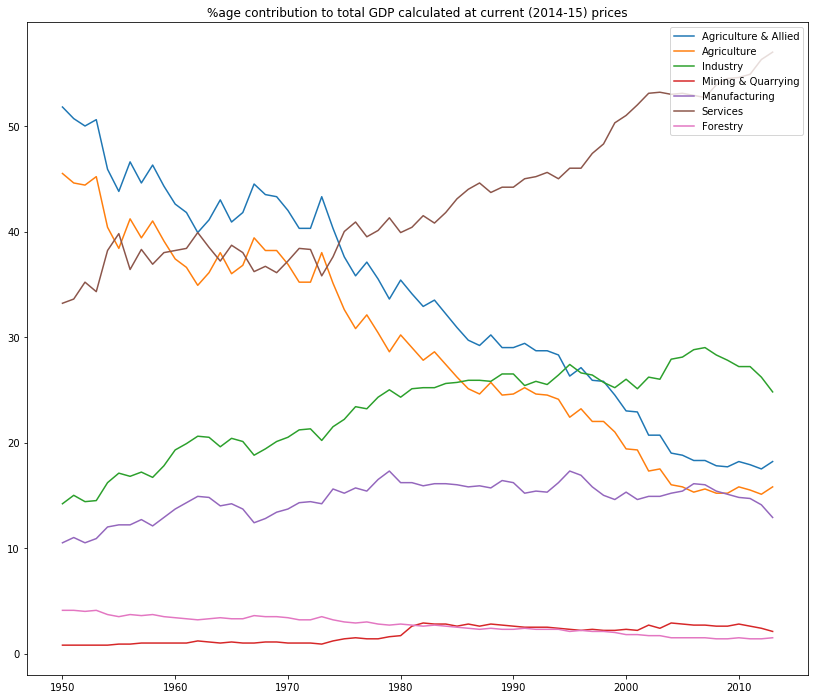

In [20]:
fig=plt.figure(figsize=(14, 12))
fig.add_subplot(1, 1, 1)

plt.title('%age contribution to total GDP calculated at current (2014-15) prices')
for i in range(0, 6):
    plt.plot(years, np.around(df.iloc[1:,i].apply(float), decimals=1))
plt.plot(years, forest)

legend = list(df)
legend = legend + ['Forestry',]

plt.legend(legend, loc='upper right')
plt.savefig('gdpf.png')

The graph shows pretty clearly the correlation between Forest Produce and the Economy - low to begin with, and decreasing.

However, it does not entirely make sense to look at forest contribution to the Indian State as a whole. The Indian State has classically been an agrarian economy, as we can verify from the plot above, and of late, Services and Industry. Not to mention that the metropolitan cities - major economic centers of the country - do not rely much on forest produce. In the face of this, traditional forest products like wood aren't particularly major players in the National (or Global) stage.

On top of that, India isn't exactly covered in forests. The latest survey by the Forest Survey of India (FSI) in 2017 reported 21.54% landmass coverage, but this figure includes open forests as well, which are defined as 'greater than 10% tree coverage' using satellite imagery to survey. There are places within the country - states, sometimes - that have a greater proportion of forests than others, and it makes sense to focus on them.

Places near forests [have a local economy that's heavily reliant on forests](https://www.researchgate.net/publication/231857621_Forest_products_and_household_economy_A_case_study_from_Mudumalai_Wildlife_Sanctuary_Southern_India). If we want to look for trends in economy, it makes sense to look more closely at these areas. But first, we'll need to identify said areas in the first place.

### Improving the 'Forest' contribution

Instead of approximating contribution as a fixed percentage of Agriculture and Allied, we add other factors to modulate it. As we see later, Forest Cover is correlated with the Economic Output generated by them. We can adjust the percentage take based on this.

Likewise, agricultural patterns like slash-and-burn have [more of an effect than is directly observed](https://www.jstor.org/stable/pdf/43740349.pdf). We can look at that as well



# Identifying Localised Impact of Forests on the Economy

Barik, S. K. and S. K. Mishra studied the contribution of forests to the economy of the northeastern States of India. As they summarise, 

"... However, for historical, topographical, logistic and complex sociological reasons, quantitative data on most of the economic and environmental components of forests are lacking. Quantification of both tangible and intangible forest benefits remains a neglected research area."

When it comes to data on forests, there isn't much of it. Especially not when considering their GDP contribution. In such a case, how do we calculate the necessary figures?

## Indirect method #1: Use known Geography

Economic Data by Sector provided by the government classifies Agriculture, Forestry, and Fisheries under one heading.

But, alongside, since agricultural data is separately specified, the difference between the two is the contribution of Forestry + Fisheries. It is safe to assume that for Inland States without any major body of water (sea/river), the contribution of Fisheries is not as prominent as that of the Forestry. For coastal States we can (1) assume equal contribution from both, or (2) if it is relatively forest-less, assume that most contribution from the Fisheries

## Indirect method #2: Correlate forest cover to forest usage

We hypothesize that the reliance of a local (or state-level) economy to forestry should have some correlation with the forest cover of the area, i.e., a state with low forest cover will probably not have much contribution to its economy from its produce.

This is just a hypothesis, so we will need to examine it experimentally.


## Getting Data

Statewise+Sectorwise data is available from The Planning Commission's website: http://planningcommission.gov.in/data/datatable/0814/table_66.pdf. The file provided contains, again, contribution for each industry. We clean it to extract only 'Agriculture' and 'Agriculture and Allied' tables.

For Forest Cover, the Forest Survey of India has detailed records dating from 1987 to present day. From this, we take the percentage of forest cover statistic for the years 2017, 2013, 2009, 2003, 1997, 1993, 1987.

In [ ]:
Loading the excel

In [21]:
xls = pd.ExcelFile("../data/table_66_2.xlsx")
sheetX = xls.parse(0)
sheetX.tail(10)

,State Name,Sector,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14 (P)
218,NaN,Mining & Quarrying,2849.0,2859.0,2987.0,2597.0,2673.0,2668.0,2537.0,2876.0,3128.0,3370.0
219,NaN,Manufacturing,23262.0,22723.0,25433.0,28736.0,28991.0,32421.0,34479.0,33419.0,35364.0,37693.0
220,NaN,Services,113526.0,124058.0,136197.0,148038.0,162904.0,175702.0,190394.0,208337.0,226261.0,243905.0
221,India (National),GDP (2004-05 Prices),2971464.0,3253073.0,3564364.0,3896636.0,4158676.0,4516071.0,4918533.0,5247530.0,5482111.0,5741791.0
222,NaN,Agriculture and Allied,565426.0,594487.0,619190.0,655080.0,655689.0,660987.0,717814.0,753832.0,764510.0,800548.0
223,NaN,Agriculture,476324.0,502996.0,523745.0,556956.0,555442.0,557715.0,610905.0,643543.0,649424.0,681412.0
224,NaN,Industry,829783.0,910413.0,1021204.0,1119995.0,1169736.0,1276919.0,1373339.0,1480657.0,1494921.0,1500225.0
225,NaN,Mining and Quarrying,85028.0,86141.0,92578.0,95997.0,98055.0,103830.0,110617.0,110725.0,108328.0,106838.0
226,NaN,Manufacturing,453225.0,499020.0,570458.0,629073.0,656302.0,730435.0,795152.0,854098.0,863876.0,857705.0
227,NaN,Services,1576255.0,1748173.0,1923970.0,2121561.0,2333251.0,2578165.0,2827380.0,3013041.0,3222680.0,3441017.0


In [22]:
sheetX.iloc[227,5]

2121561.0

In [23]:
sheetX = sheetX[sheetX.Sector != 'Industry']
sheetX = sheetX[sheetX.Sector != 'Mining and Quarrying']
sheetX = sheetX[sheetX.Sector != 'Mining & Quarrying']
sheetX = sheetX[sheetX.Sector != 'Manufacturing']
sheetX = sheetX[sheetX.Sector != 'Services']
sheetX = sheetX.reset_index(drop=True)
sheetX
# sheetX[(sheetX.Sector != 'Industry') and (sheetX.Sector != 'Mining and Quarrying') and (sheetX.Sector != 'Manufacturing') and (sheetX.Sector != 'Services')]

,State Name,Sector,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14 (P)
0,Andhra Pradesh,GSDP (2004-05,224713.0,246210.0,273730.0,306645.0,327731.0,342571.0,382459.0,411184.0,432112.0,455937.0
1,NaN,Agriculture and Allied,56344.0,59789.0,60966.0,71563.0,72108.0,72262.0,75877.0,76533.0,82048.0,87325.0
2,NaN,Agriculture,46251.0,49335.0,50112.0,59523.0,59700.0,59924.0,62191.0,61137.0,64878.0,68450.0
3,Andaman and Nicobar Islands,GSDP (2004-05,1813.0,1907.0,2251.0,2479.0,2834.0,3208.0,3460.0,3734.0,3989.0,4310.0
4,NaN,Agriculture and Allied,299.0,229.0,303.0,305.0,329.0,332.0,352.0,359.0,374.0,386.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,Agriculture and Allied,49936.0,51045.0,52129.0,55365.0,54063.0,57814.0,56603.0,57091.0,59290.0,62420.0
95,NaN,Agriculture,40020.0,40757.0,41168.0,43695.0,42155.0,45659.0,44702.0,44822.0,46774.0,49413.0
96,India (National),GDP (2004-05 Prices),2971464.0,3253073.0,3564364.0,3896636.0,4158676.0,4516071.0,4918533.0,5247530.0,5482111.0,5741791.0
97,NaN,Agriculture and Allied,565426.0,594487.0,619190.0,655080.0,655689.0,660987.0,717814.0,753832.0,764510.0,800548.0


In [24]:
perc = sheetX.iloc[2,2:]/sheetX.iloc[1,2:]
perc

2004-05        0.820868
2005-06        0.825152
2006-07        0.821966
2007-08        0.831757
2008-09        0.827925
2009-10         0.82926
2010-11        0.819629
2011-12        0.798832
2012-13        0.790732
2013-14 (P)    0.783853
dtype: object

In [26]:
stats = {}
for i in range(0, 97, 3):
    state = sheetX.iloc[i, 0]
    perc = sheetX.iloc[i+2,2:]/sheetX.iloc[i+1,2:]
    av = perc.sum()/10
    av = 1 - av
    stats[state] = [perc, av]
#     print('{0}\t\t\t{1}'.format(state, av))
#     print(i)

In [27]:
df2 = pd.DataFrame(stats)

In [28]:
df2

,Andhra Pradesh,Andaman and Nicobar Islands,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,India (National)
0,2004-05 0.820868 2005-06 0.82515...,2004-05 0.789298 2005-06 0.77292...,2004-05 0.46732 2005-06 0.45058...,2004-05 0.848638 2005-06 0.84328...,2004-05 0.842764 2005-06 0.83350...,2004-05 0.909091 2005-06 0.92405...,2004-05 0.694655 2005-06 0.72675...,2004-05 0.93053 2005-06 0.92999...,2004-05 0.663327 2005-06 0.67315...,2004-05 0.81777 2005-06 0.84402...,...,2004-05 0.655738 2005-06 0.75510...,2004-05 0.953467 2005-06 0.95183...,2004-05 0.852948 2005-06 0.85421...,2004-05 0.882353 2005-06 0.88427...,2004-05 0.863106 2005-06 0.84959...,2004-05 0.827957 2005-06 0.82023...,2004-05 0.904552 2005-06 0.90461...,2004-05 0.74529 2005-06 0.73760...,2004-05 0.801426 2005-06 0.79845...,2004-05 0.842416 2005-06 0.84610...
1,0.185003,0.300799,0.470191,0.160556,0.133882,0.19002,0.265584,0.0634542,0.421774,0.237137,...,0.301156,0.0500177,0.129283,0.188796,0.138449,0.297869,0.095054,0.263733,0.209631,0.151914


In [29]:
s3 = df2.iloc[1,:].sort_values(ascending=False)

In [30]:
s3.keys()

Index(['Arunachal Pradesh', 'Goa', 'Mizoram', 'Manipur', 'Nagaland',
       'Puducherry', 'Andaman and Nicobar Islands', 'Tripura', 'Kerala',
       'Maharashtra', 'Chhattisgarh', 'Himachal Pradesh', 'Uttarakhand',
       'Meghalaya', 'Gujarat', 'Jharkhand', 'West Bengal', 'Odisha',
       'Chandigarh', 'Sikkim', 'Andhra Pradesh', 'Jammu & Kashmir', 'Assam',
       'Karnataka', 'India (National)', 'Tamil Nadu', 'Bihar', 'Rajasthan',
       'Madhya Pradesh', 'Uttar Pradesh', 'Delhi', 'Haryana', 'Punjab'],
      dtype='object')

In [31]:
averages = s3

In [32]:
states = s3.keys()

In [33]:
states[:1]

Index(['Arunachal Pradesh'], dtype='object')

In [34]:
xls1 = pd.ExcelFile("../data/ForestCover.xlsx")
sheetY = xls1.parse(1)
# sheetY

In [35]:
sheetY = sheetY.sort_values('Percentage Cover', ascending=False).reset_index(drop=True)

In [36]:
sheetY.iloc[:,0]

0               Mizoram
1                   A&N
2     Arunachal Pradesh
3               Manipur
4             Meghalaya
5              Nagaland
6               Tripura
7                   Goa
8                Kerala
9                Sikkim
10        Uttarakhand\n
11         Chhattisgarh
12                Assam
13               Odisha
14          Jharkhand\n
15     Himachal Pradesh
16       Madhya Pradesh
17           Tamil Nadu
18            Karnataka
19          West Bengal
20           Chandigarh
21       Andhra Pradesh
22          Maharashtra
23                Delhi
24           Puducherry
25                  J&K
26                Bihar
27              Gujarat
28        Uttar Pradesh
29            Rajasthan
30             Punjab\n
31              Haryana
Name: State, dtype: object

## Using the data

### Forest+Fisheries Contribution to Agriculture Sector

Given state-wise sector contribution data, we get the average ratio of fisheries+forest to agriculture as:

\begin{equation*}
    value_{state} &= \frac{agriculture - agricultureAndAllied}{agriculture} 
\end{equation*}

We plot states in descending order of this contribution.

### Percentage Forest Cover 

We take the data from 2017 and plot in descending order of percentage cover.

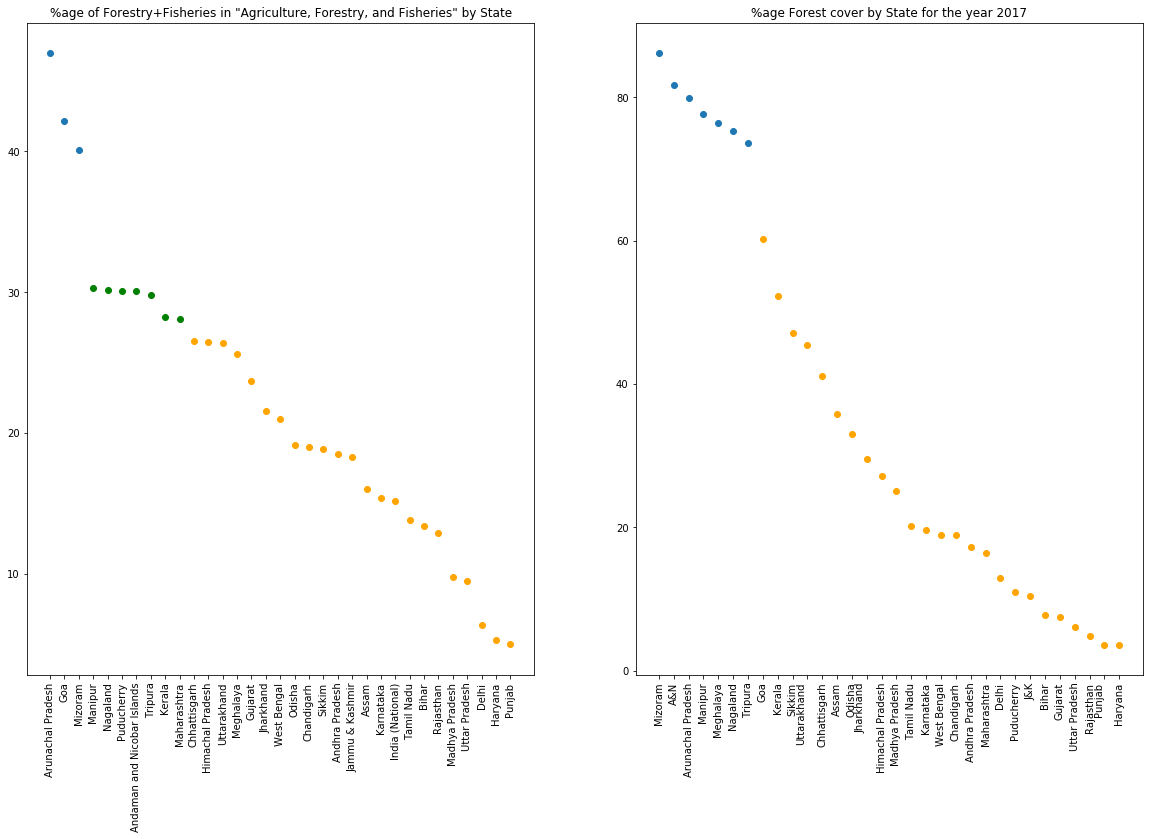

In [39]:
fig=plt.figure(figsize=(20, 12))
fig.add_subplot(1, 2, 1)

plt.title('%age of Forestry+Fisheries in "Agriculture, Forestry, and Fisheries" by State')
plt.scatter(states[:3], averages[:3]*100)
plt.scatter(states[3:10], averages[3:10]*100, c='green')
plt.scatter(states[10:], averages[10:]*100, c='orange')
# plt.scatter(states, averages)
plt.xticks(states, states, rotation='vertical')

fig.add_subplot(1,2,2)

plt.title('%age Forest cover by State for the year 2017')
plt.scatter(sheetY.iloc[:7,0], sheetY.iloc[:7,1])
plt.scatter(sheetY.iloc[7:,0], sheetY.iloc[7:,1], c='orange')
plt.xticks(sheetY.iloc[:,0], sheetY.iloc[:,0], rotation='vertical')


# legend = list(df)
# legend = legend + ['Forestry',]

# plt.legend(legend, loc='upper right')
# plt.show()
plt.savefig('state.png')

In [385]:
sheetX.iloc[2,2]/sheetX.iloc[1,2]

0.8208682379667755